# Tag Distribution Breakdown

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = None

### HRCS Research Activity Codes
#### Top level RAC codes

In [3]:
ra_df = pd.read_parquet('../data/clean/ukhra_ra.parquet')
ra_df['count'] = 1
ra_df.head()

,index,FundingOrganisation,OrganisationReference,AwardTitle,AwardAbstract,AllText,TextLen,year,RA,count
0,0,Action Medical Research,1942,Over two years to investigate sleep and memory...,Background\nEpilepsy in early childhood is ass...,Over two years to investigate sleep and memory...,1266.0,2014,[2.1],1
1,9950,Medical Research Council,MC_UU_12010/7,Innate pathways in inflammatory and infectious...,Goals To define mechanisms of innate immune se...,Innate pathways in inflammatory and infectious...,3662.0,2014,[2.1],1
2,9951,Medical Research Council,MC_UU_12010/8,Activation of innate nucleic acid sensing path...,The innate immune response is critical for suc...,Activation of innate nucleic acid sensing path...,2976.0,2014,[2.1],1
3,9952,Medical Research Council,MC_UU_12010/9,Single-molecule super-resolution microscopy of...,Single-molecule super-resolution microscopy of...,Single-molecule super-resolution microscopy of...,1587.0,2014,[1.1],1
4,9955,Medical Research Council,MC_UU_12011/3,"Nutrition, Development and Lifelong Health: St...",Past research in this programme has shown that...,"Nutrition, Development and Lifelong Health: St...",2594.0,2014,"[3.1, 2.2]",1


In [4]:
ra_df_exploded = ra_df.explode('RA')

In [5]:
len(ra_df)

35388

In [6]:
ra_df_exploded['RA'].value_counts()[0:20]

RA
2.1    9807
1.1    5656
5.1    2719
4.1    2416
6.1    1943
8.1    1884
2.2    1858
4.2    1813
7.1    1707
3.1    1142
7.3    1045
2.3    1016
2.6    1005
5.2     986
2.4     841
4.5     782
1.2     744
5.9     722
2.5     711
8.4     665
Name: count, dtype: int64

In [7]:
ra_df_exploded['RA'].nunique()

48

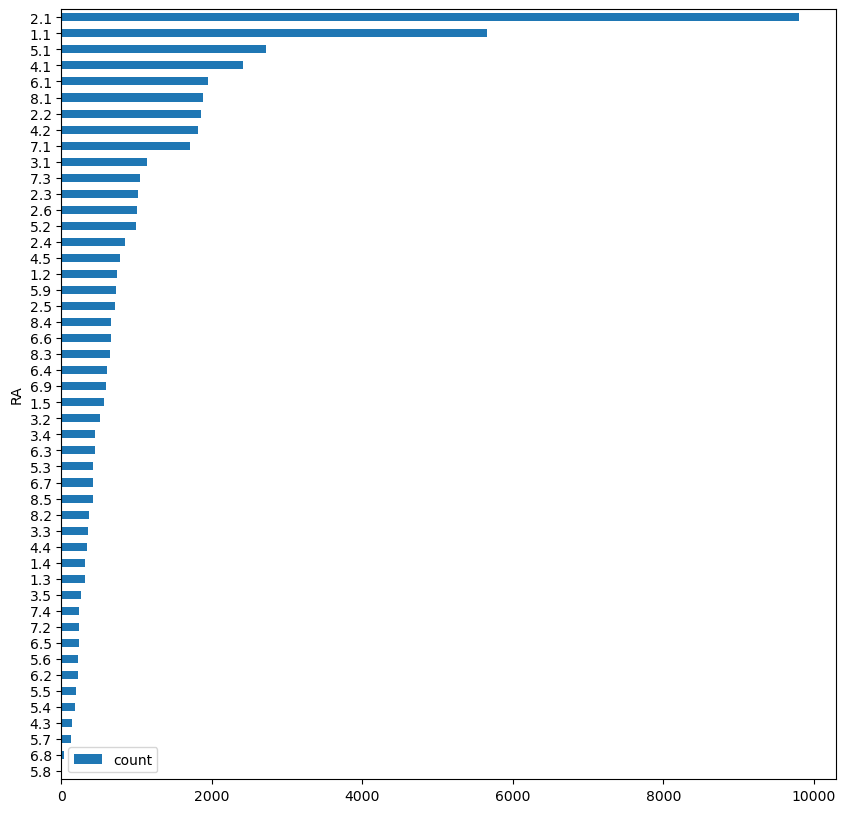

In [11]:
ra_counts = ra_df_exploded[['RA', 'count']].copy()
ra_counts = ra_counts.groupby('RA', as_index=False).sum()
# sort by count
ra_counts = ra_counts.sort_values('count', ascending=True)
ra_counts.plot(kind='barh', y='count', x='RA', figsize=(10, 10));

### HRCS Health Categories

In [9]:
hc_df = pd.read_parquet('../data/clean/ukhra_hc.parquet')
hc_df['count'] = 1
hc_df.head()

,FundingOrganisation,OrganisationReference,AwardTitle,AwardAbstract,AllText,TextLen,year,HC,count
0,Action Medical Research,1942,Over two years to investigate sleep and memory...,Background\nEpilepsy in early childhood is ass...,Over two years to investigate sleep and memory...,1266.0,2014,neurological,1
1,Medical Research Council,MC_UU_12010/7,Innate pathways in inflammatory and infectious...,Goals To define mechanisms of innate immune se...,Innate pathways in inflammatory and infectious...,3662.0,2014,infection,1
2,Medical Research Council,MC_UU_12010/8,Activation of innate nucleic acid sensing path...,The innate immune response is critical for suc...,Activation of innate nucleic acid sensing path...,2976.0,2014,infection,1
3,Medical Research Council,MC_UU_12010/9,Single-molecule super-resolution microscopy of...,Single-molecule super-resolution microscopy of...,Single-molecule super-resolution microscopy of...,1587.0,2014,inflammatory and immune system,1
4,Medical Research Council,MC_UU_12011/3,"Nutrition, Development and Lifelong Health: St...",Past research in this programme has shown that...,"Nutrition, Development and Lifelong Health: St...",2594.0,2014,metabolic and endocrine,1


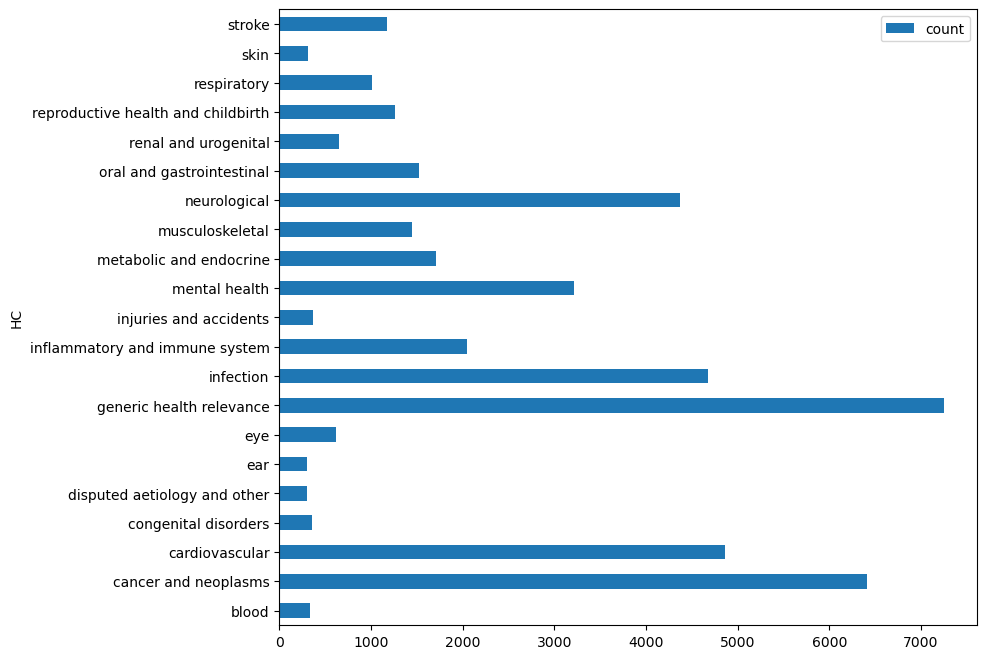

In [10]:
higher_hc_counts = hc_df[['HC', 'count']].copy()
higher_hc_counts = higher_hc_counts.groupby('HC', as_index=False).sum()
higher_hc_counts.plot(kind='barh', y='count', x='HC', figsize=(9, 8));

In [20]:
train = pd.read_parquet('../data/preprocessed/train.parquet')

In [21]:
train

,FundingOrganisation,OrganisationReference,AwardTitle,AwardAbstract,AllText,TextLen,year,RA,RA1,RA2
12932,Department of Health (England),HS&dr/13/07/48,Creating Learning Environments for Compassiona...,The quality of relationships with staff is key...,Creating Learning Environments for Compassiona...,3429.0,2014,7.3,7,7.3
21704,Medical Research Council,MR/L002876/1,Osteoarthrtis may be treated as an environment...,The primary cilium is a microtubule-based stru...,Osteoarthrtis may be treated as an environment...,2026.0,2018,2.1 Biological and endogenous factors,2,2.1
83724,Department of Health (England),HPRU-002,Acute Respiratory Infection,NIHR Health Protection Research Unit Award - n...,Acute Respiratory Infection NIHR Health Protec...,94.0,2014,8.2,8,8.2
16276,Medical Research Council,MR/P014313/1,Assessing policy implementation and health sys...,This project addresses a critical evidence gap...,Assessing policy implementation and health sys...,2137.0,2018,8.1 Organisation and delivery of services,8,8.1
37876,Medical Research Council,G1001712/1,Large-effect genetic variants in susceptibilit...,The aim of the project is to utilise next-gene...,Large-effect genetic variants in susceptibilit...,2957.0,2014,2.6,2,2.6
...,...,...,...,...,...,...,...,...,...,...
11284,Engineering and Physical Sciences Research Cou...,EP/K037323/1,Street mobility and accessibility: developing ...,Walking (or cycling) around an area helps peop...,Street mobility and accessibility: developing ...,4067.0,2014,3.2,3,3.2
65730,Medical Research Council,UKDRI-6008,RNA Networks,The UK Dementia Research Institute (UK DRI) is...,RNA Networks The UK Dementia Research Institut...,2311.0,2022,2.1 Biological and endogenous factors,2,2.1
43405,Cancer Research UK,HRCS2014_01585,Birmingham Cancer Research UK Centre (Clinical...,Clinical Training associated with the Centre: ...,Birmingham Cancer Research UK Centre (Clinical...,1420.0,2014,5.9,5,5.9
860,Medical Research Council,MC_U105261167,Statistical modelling: theory and applications,We propose to develop methods of statistical i...,Statistical modelling: theory and applications...,1260.0,2014,2.5,2,2.5
